# <center>Predicting Autism Spectrum Disorder using Machine Learning </center>

# Overview

Autism spectrum disorder (ASD) refers to a neurological developmental disorder characterised by an impaired communication and social interaction ability which may also affect a patient’s learning behaviour. It usually starts at an early age and persists for a lifetime. There are various subtypes of Autism Spectrum disorder such as Asperger syndrome and Pervasive developmental disorders. There is a lack of data availability for prediction purposes, making it hard to perform accurate analyses to improve the effectiveness, sensitivity, specificity, and predictive accuracy of the ASD screening process. 

The dataset [1] used in this project was created by Prof. Fadi Thabtah and made freely available after being published in the article "Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment". The dataset comprises a total of 20 features to be used for further examination primarily in discovering substantial autistic traits and developing the classification of ASD cases. Out of the 20 features, ten consist of behavioral characteristics (AQ-10-Adult) shown below as well as ten people characteristics that have shown to be effective in identifying the ASD cases from controls in behavior science.

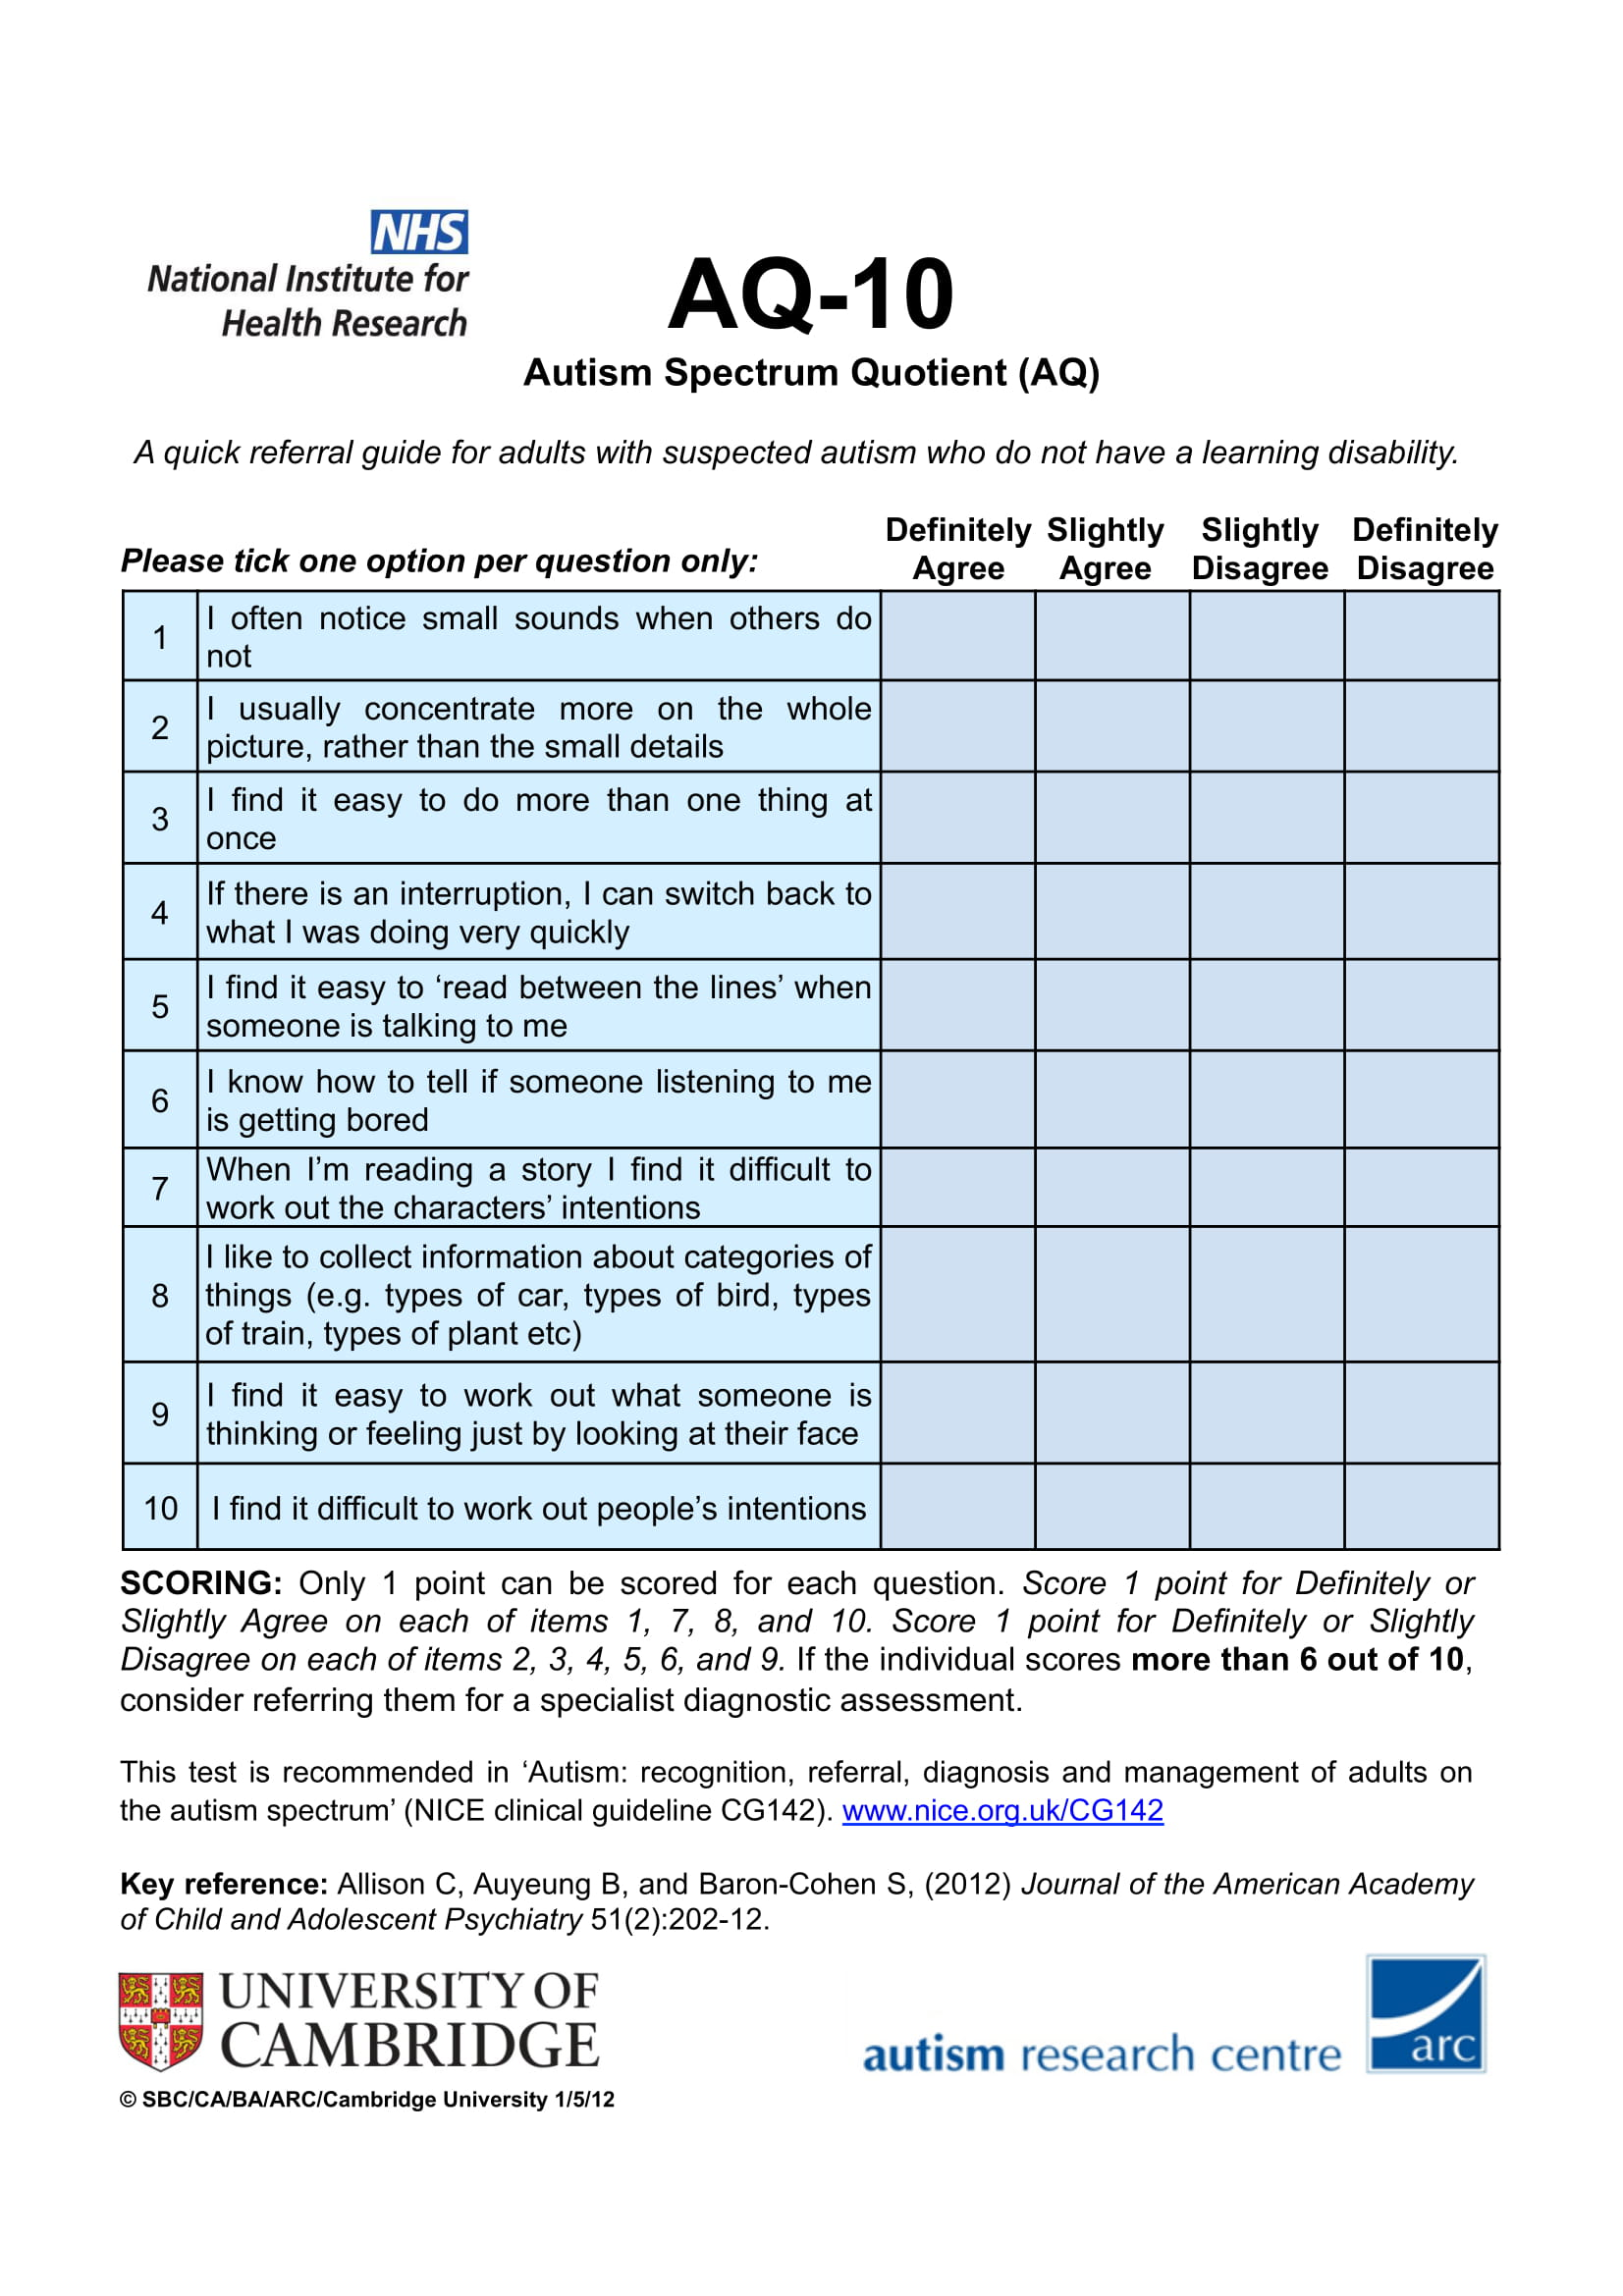

Machine learning (ML) gives novel chances to human behavior research and clinical interpretation. In this work, machine learning is used to predict whether an individual has ASD based on demographic, genetic and AQ-10 features. This implementation can be used to enhance ASD screening methods, making it more accessible and easy for the general public.

## Data Exploration

In [24]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The dataset will be loaded into the dataframe df using the pandas library. All missing values characterized by '?' will be denoted as NaN

In [6]:
df = pd.read_csv('autism_data.csv', na_values = '?')

We will use the head() function to view initial state of dataset

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism in family,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


It can be seen that there are some unnecessary columns and column headings that should be renamed. The columns A1_Score till A10_Score are redundent as their overall score is stored in results column. We can rename results as A_Score_Results and drop the individual 10 columns.  

In [7]:
df.drop(df.loc[:, 'A1_Score':'A10_Score'].columns, axis = 1, inplace = True)
df.rename(columns = {'result':'A_Score_Results'}, inplace = True) 
df.rename(columns = {'Class/ASD':'Class'}, inplace = True) 

We can use the info() function to get an overview of our dataset. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 11 columns):
age                 702 non-null float64
gender              704 non-null object
ethnicity           609 non-null object
jundice             704 non-null object
autism in family    704 non-null object
country_of_res      704 non-null object
used_app_before     704 non-null object
A_Score_Results     704 non-null int64
age_desc            704 non-null object
relation            609 non-null object
Class               704 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 60.6+ KB


## Data Cleaning

Before inputting data into classifiers, it is necessary to ensure that quality of our data is high. Data cleaning invloves managing incorrect or outdated information, resulting in highest quality data which will increase overall productivity. 

Firstly, it is checked to see how many columns have missing values in our dataset. 

In [7]:
df.isnull().sum()

age                  2
gender               0
ethnicity           95
jundice              0
autism in family     0
country_of_res       0
used_app_before      0
A_Score_Results      0
age_desc             0
relation            95
Class                0
dtype: int64

There are missing values in the three object variables, 'age', 'ethnicity' and 'relation'. Let us now see how to effectively handle these values. 

### Handing missing values for 'Age' column

We can use measures of central tendency of the overall 'Age' column to impute the missing values with it. Let us see the mean value of the 'Age' column

In [10]:
print(df['age'].mean())

29.698005698005698


Before using this value for imputation however, it is necessary to check that there are no outliers in the age column. We use a boxplot to visualize the 'age' column values. 

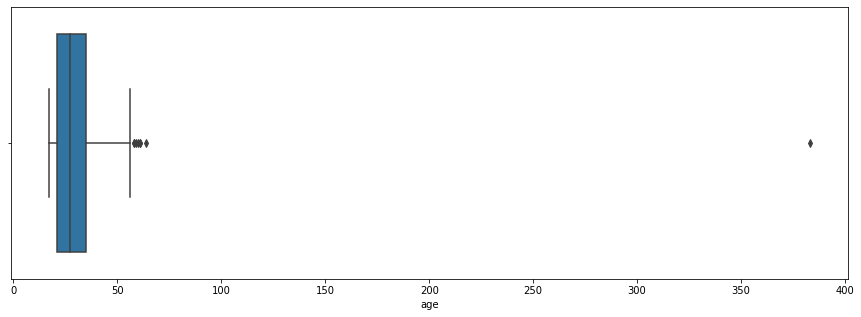

In [11]:
import seaborn as sns

plt.figure(figsize=(15,5))
ax = sns.boxplot(x="age", data=df);

It can be seen that there are many outliers and they must be removed if we want to use the mean value of age to impute the missing values

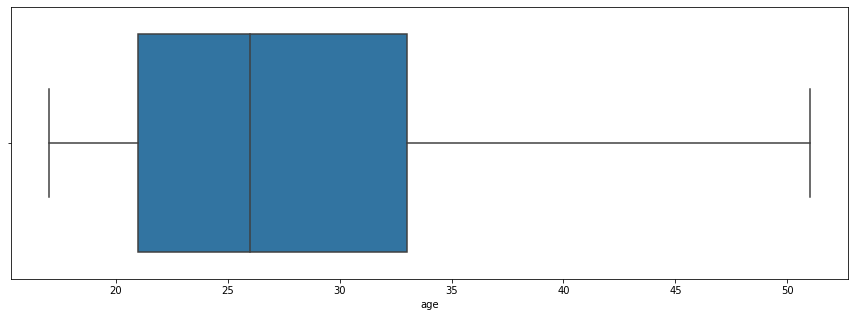

In [12]:
thresh = df[df['age'] > 51].index
df.drop(thresh , inplace=True)

plt.figure(figsize=(15,5))
ax = sns.boxplot(x="age", data=df);

Now, we can go ahead and fill the missing values with the new mean. 

In [13]:
print(df['age'].mean())

28.106983655274888


In [14]:
df['age'] = df['age'].fillna(df['age'].mean())
df['age'].isnull().sum()

0

### Handling missing values for 'Ethnicity' and 'Relation' columns

In [14]:
df[['ethnicity', 'relation']].isnull().sum()

ethnicity    92
relation     92
dtype: int64

There are 92 missing values for both ethnicity and relation columns. We will make a separate category called "Unknown" and place the missing values there. 

In [15]:
df['ethnicity'] = df['ethnicity'].fillna('Unknown')
df['relation'] = df['relation'].fillna('Unknown')

In [16]:
df['ethnicity'].value_counts()

White-European       213
Asian                122
Unknown               92
'Middle Eastern '     91
Black                 43
'South Asian'         36
Others                30
Latino                20
Pasifika              11
Hispanic              11
Turkish                6
Name: ethnicity, dtype: int64

In [17]:
df['relation'].value_counts()

Self                          503
Unknown                        92
Parent                         48
Relative                       24
Others                          4
'Health care professional'      4
Name: relation, dtype: int64

In [20]:
df.isnull().sum()

age                 0
gender              0
ethnicity           0
jundice             0
autism in family    0
country_of_res      0
used_app_before     0
A_Score_Results     0
age_desc            0
relation            0
Class               0
dtype: int64

Now that all missing values have been taken care of, let us format the dataframe to exclude extra spaces and uneeded characters. 

In [22]:
df['ethnicity'] = df['ethnicity'].map(lambda x: x.strip('\''))
df['relation'] = df['relation'].map(lambda x: x.strip('\''))
df['country_of_res'] = df['country_of_res'].map(lambda x: x.strip('\''))
df['age_desc'] = df['age_desc'].map(lambda x: x.strip('\''))
df.columns = df.columns.str.strip()

Finally, let us view our cleaned dataset

In [23]:
df.head()

,age,gender,ethnicity,jundice,autism in family,country_of_res,used_app_before,A_Score_Results,age_desc,relation,Class,contry_of_res
0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO,United States
1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO,Brazil
2,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,Spain
3,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO,United States
4,40.0,f,Unknown,no,no,Egypt,no,2,18 and more,Unknown,NO,Egypt


## Data Visualization

Turning the dataset into a visual context such as graphs and figures is crucial in order to understand it better, see the patterns, trends or outliers. Here, data visualization is applied to find proof or relation of data towards the initial questions stated.

#### Dataset Description - Sample for 18 and above

This dataset is focusing only for those who are 18 years old and above. Hence, its can be categorized as observation of ASD positive among adults.

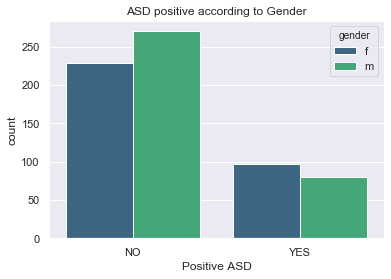

In [27]:
# Probability to have positive ASD according to gender
sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df, hue="gender", palette='viridis');
ax.set_title('ASD positive according to Gender');
ax.set_xlabel('Positive ASD');

Above is an overview of the entire dataset that indicate the number of ASD positive and negative among the samples according to the respectective male and female population. In order to understand more on the illness, the below segment will be only on records that are Positive ASD.

#### Data Visualization for sample that are Positive ASD

The Data visualization for the below segment will be focusing more on those patients that are confirmed positive ASD and what variables that might contribute to high probability of them to afflict with ASD

In [28]:
# Only data for positive ASD
dataYes= df[df['Class']=='YES']

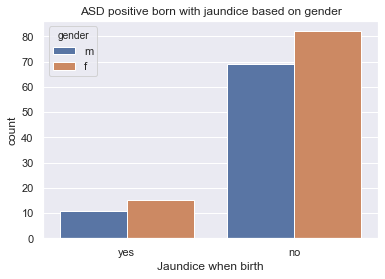

In [30]:
# Jundice and positive ASD based on gender
sns.set(style="darkgrid")
ax = sns.countplot(x="jundice", data=dataYes, hue="gender")
ax.set_title('ASD positive born with jaundice based on gender')
ax.set_xlabel('Jaundice when birth');

According to the diagram, female that are born with jaundice have a higher chance to be ASD positive compared to male ratio. However, the above diagram also illustrate that those who are ASD positive are not necessarily have jaundice when birth. These shows that jaundice have a weak link with ASD.

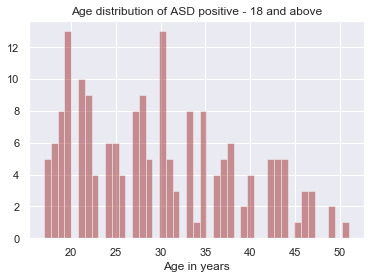

In [31]:
# Distribution of ASD positive according to age
ax = sns.distplot(dataYes['age'],kde=False,bins=45,color='darkred')
ax.set_title('Age distribution of ASD positive - 18 and above')
ax.set_xlabel('Age in years');

Most of the ASD positive are around 20 to 30 years of age. As shown, the number of cases decreases as the age increases. It can be said that most cases are able to be detected since younger age.

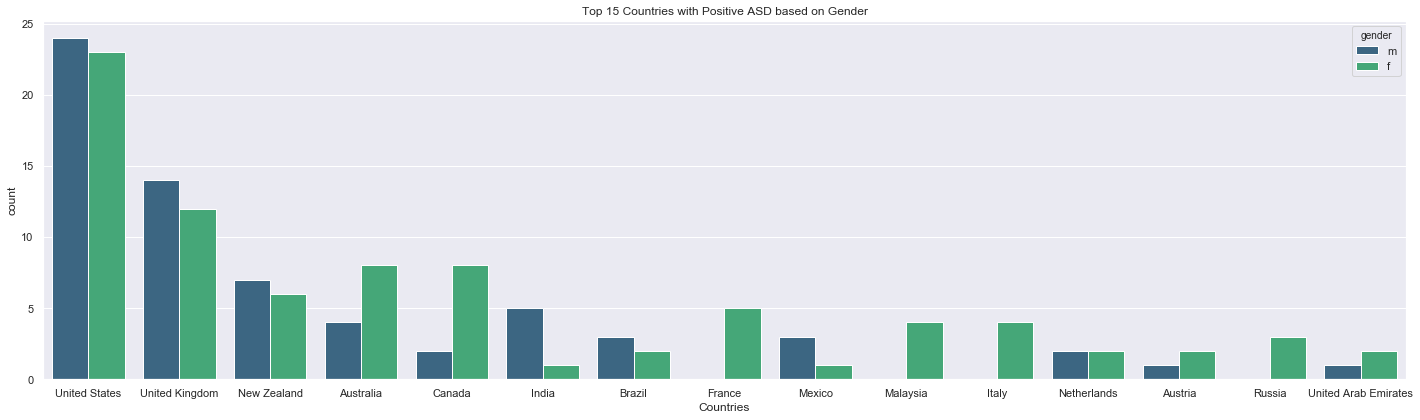

In [32]:
# Distribution of ASD positive based on top 15 countries
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res',data=dataYes,order= dataYes['contry_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Top 15 Countries with Positive ASD based on Gender')
plt.xlabel('Countries')
plt.tight_layout()

The above visualization indicate the top 15 countries with most cases of ASD positive. Countries like UK, US, NZ, Australia and Canada are the most affected with highest number of cases. Moreover, as shown, female population is dominating the chart compared to male for most of the countries.

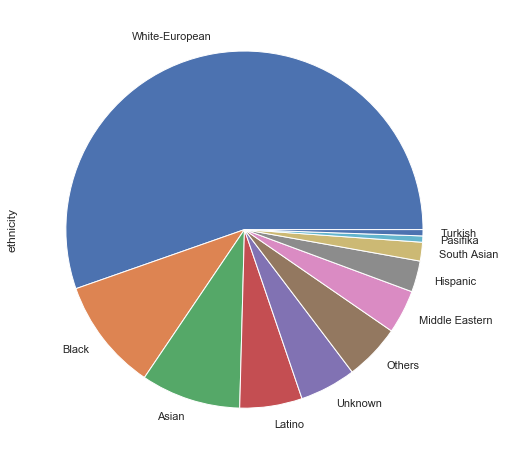

In [33]:
# Distribution of ASD positive based on ethnicity
plt.figure(figsize=(8,12))
dataYes['ethnicity'].value_counts().plot.pie()
plt.gca().set_aspect('equal')

Based on the pie chart, White and European ethnicity dominating more than half of the portion which indicate that they are the highest contributor to ASD positive cases.

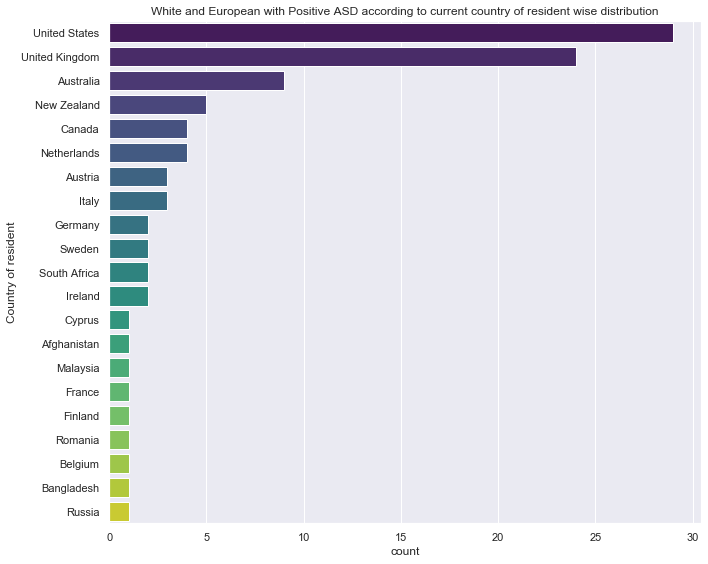

In [34]:
# Distribution of ASD positive for White and European Ethnicity based on country of resident

plt.figure(figsize=(10,8))
sns.countplot(y='contry_of_res',data=dataYes[dataYes['ethnicity']=='White-European'],order=dataYes[dataYes['ethnicity']=='White-European']['contry_of_res'].value_counts().index[:],palette='viridis')
plt.title('White and European with Positive ASD according to current country of resident wise distribution')
plt.ylabel('Country of resident')
plt.tight_layout()

This graph illustrate White and European ethnicity diagnosed with ASD positive based on their country of resident. Majority of the patients are those who reside in countries like UK, US, NZ, Australia and Canada which affirm their position as top contributors of positive ASD cases in the world as mentioned from the previous graph.

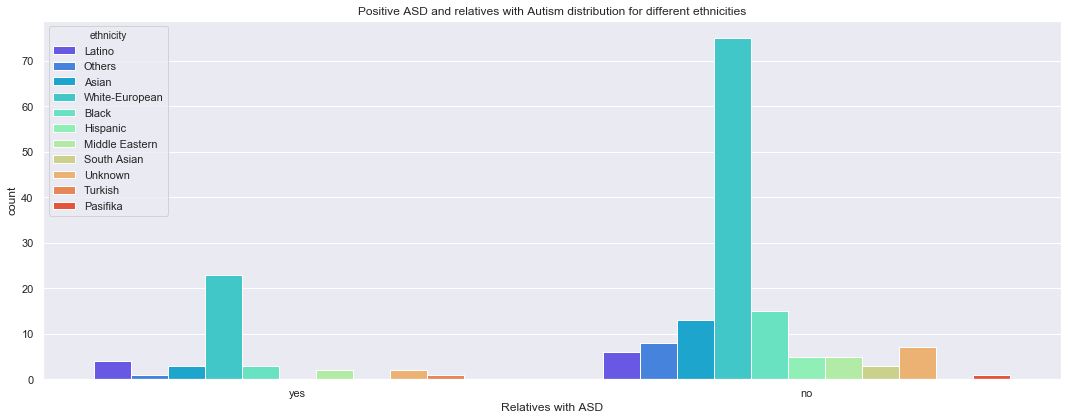

In [36]:
#Visualizing the distribution of autism in family within different ethnicity

plt.figure(figsize=(15,6))
sns.countplot(x='autism in family',data=dataYes, hue='ethnicity',palette='rainbow')
plt.title('Positive ASD and relatives with Autism distribution for different ethnicities')
plt.xlabel('Relatives with ASD')
plt.tight_layout()

As can be generally observed above, those without Autism in their genes does not mean they wont be afflicted by ASD. This shows that genetics and ASD positive have a weak link with one another. However still, White and Europeans ethnicity have a very high chance of being ASD positive if they have family history with autism compared to other ethnicities.

## Data Preprocessing

After completing the data cleaning steps, the clean data will be preprocessed and made ready for application of machine learning. 

To utilize functions from the SciKit Learn machine learning library, all values in the dataset should be numeric. We will be using the LabelEncoder fit_transform method to convert all columns with 'object' data type into numeric values. 

The following categorical columns will be transformed into numeric: Gender, Ethnicity, Jaundice, Autism in family, Country of Residence, Used application before, Age Description, Relation, Class

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df:
    if df[col].dtype == 'object':
        df[col]=le.fit_transform(df[col])

The tranfomed dataset is shown below. The target column Class has transformed the 'NO' values to 0 and 'YES' to 1

In [39]:
df.head()

,age,gender,ethnicity,jundice,autism in family,country_of_res,used_app_before,A_Score_Results,age_desc,relation,Class,contry_of_res
0,26.0,0,10,0,0,63,0,6,0,4,0,63
1,24.0,1,3,0,1,13,0,5,0,4,0,13
2,27.0,1,3,1,1,55,0,8,0,2,1,55
3,35.0,0,10,0,1,63,0,6,0,4,0,63
4,40.0,0,9,0,0,22,0,2,0,5,0,22


A good machine learning model is one that has the ability to generalize on new data points based on its training from the data points it was fit with. There may be cases however, when the model learns its training data points too much such that it loses its ability to classify new points. The model overfits to the training data, gives a high accuracy in training but a low accuracy in testing. 

While there may be many causes of overfitting, a common one is the imbalance of classes in the dataset. If the occurance of one class outweighs the other classes by a very high margin then the model learns too much of only that class and ends up overfitting to its data points. It will result in almost 100% accuracy in classifying the high occuring class and give a very low accuracy in classifying the low occurance class. 

Consequently, we check the ditribution of classes in our dataset. 

In [40]:
df["Class"].value_counts()

0    498
1    177
Name: Class, dtype: int64

As seen from the ditribution, class 'NO' occurs almost three times more than class 'YES'. Modelling with this data has high chance that it will end up overfitting to the 'NO' data points. 

To solve this problem, we will resample our dataset such that there an equal distribution of class occurances. We do not want to lose information on class 'NO' so instead of downsampling, we chose to upsample. By using the resample function from sklearn.utils library, we will upsample the minority class 'YES' to match the occurances of the majority class 'NO'. 

In [27]:
from sklearn.utils import resample
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]
 
# Upsample minority class
# random_state used for reproducible results
df_minority_upsampled = resample(df_minority, replace=True,n_samples=498, random_state=23) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()

1    498
0    498
Name: Class, dtype: int64

The upsampled dataframe shows an equal distribution of classes. Now the overfitting scenario can be avoided. 

We can now define our feature matrix (X) and target array (y) for solving the classification problem. 

In [28]:
X = df_upsampled.drop('Class', 1)
y = df_upsampled['Class']

The feature matrix consists of 10 features which will be used to classify the target 'Class' column and predict whether an individual has indications of autism. 

In [29]:
X.shape

(996, 11)

Next, we will use the concept of hold out sets and split our dataset into training and testing. The training set will be used to fit the model while the testing set will consist of unseen data that will be used to measure the performance of the model. By using the train_test_split function, we will split the dataset into 70% train set and 30% test set.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

Furthermore, we want to make sure that all our features are being fairly weighed by the machine learning algorithm regardless of their units, magnitudes and range. This is especially beneficial for algorithms that compute distance to classify data points like K-Nearest Neighbor (KNN). A visualization of how numerical values vary across the feature variables is shown below.

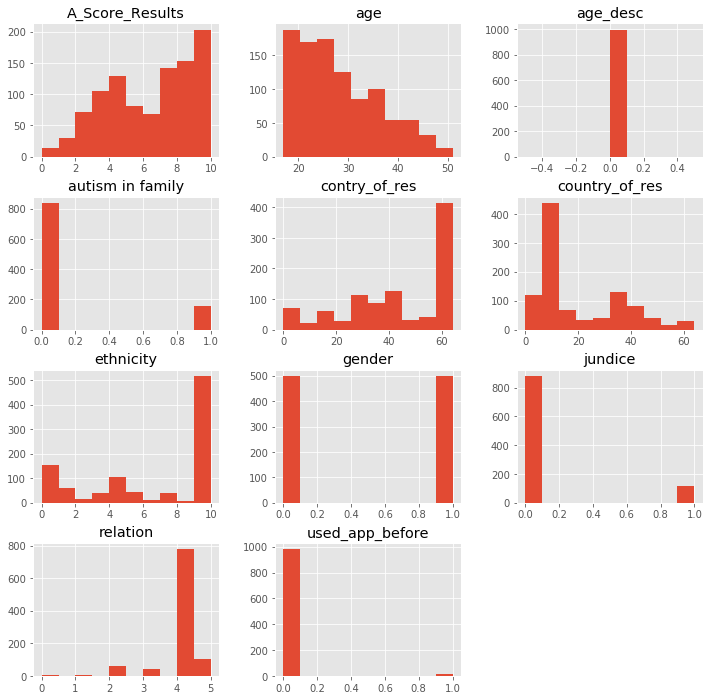

In [31]:
plt.style.use('ggplot');
pd.DataFrame.hist(X, figsize = [12,12]);

There is a magnitude difference between variables age_desc, age, country of residence and the other variables. We will use feature scaling to standardize the independent features in the data to a fixed range by using the StandardScaler function. We want no information from the test data to be used to scale training data or direct the training process of the machine learning model so that an accurate prediction accuracy score can be achieved. Hence, we first split the data and then apply scaling separately.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [33]:
rescaledX_train

array([[-1.31329928,  0.97310193,  0.91269295, ...,  0.        ,
        -1.25382628, -0.12660144],
       [ 0.25388591, -1.02764157,  0.66125145, ...,  0.        ,
         1.54718947, -0.07580052],
       [ 0.1333332 , -1.02764157, -1.60172201, ...,  0.        ,
         0.1466816 , -0.27900422],
       ...,
       [ 0.49499132,  0.97310193, -1.60172201, ...,  0.        ,
         0.1466816 , -0.73621254],
       [-0.46943034,  0.97310193, -1.60172201, ...,  0.        ,
         0.1466816 ,  0.63541243],
       [ 0.25388591,  0.97310193, -1.60172201, ...,  0.        ,
         0.1466816 ,  0.63541243]])

Now our data is ready to be inputted into the machine learning algorithms. 

# Machine Learning Models

After the preprocessing steps, we are ready to input our data into the machine learning algorithms. For this project's binary classification problem, four supervised learning algorithms will be used and compared to see which results in highest performance. We will be focusing on:

1. Gaussian Naive Bayes
2. K-Nearest Neighbor
3. Logistic Regression
4. Support Vector Machine

## Gaussian Naive Bayes

Gaussian Naive Bayes is an extension of Naive Bayes. It uses the Gaussian/Normal distribution to estimate the distribution of data. It is easiest to work with because it only needs to calculate the mean and standard deviation of the training data in addition to the probabilities for each class, in order to make predictions. We use it in our binary classification problem. 

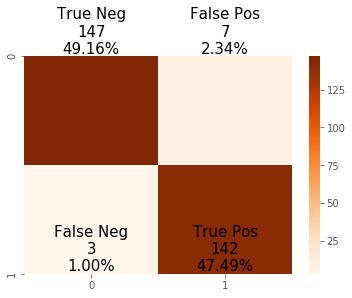

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB 

# Define a function for visualizing confusion matrix
def visualize_cm(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    annot_kws = {"ha": 'center',"va": 'bottom', "color":'black',"size": 15}
    sns.heatmap(cm, annot=labels, fmt='' , cmap='Oranges', annot_kws=annot_kws)

# Define Gaussian NB model from sklearn library
nb = GaussianNB()

# Fit nb to the train set
nb.fit(rescaledX_train, y_train)  

# Predict on the test set and show confusion matrix
y_pred = nb.predict(rescaledX_test) 
cm_nb = confusion_matrix(y_test, y_pred)
visualize_cm(cm_nb)

Taking class 0 as Negative and class 1 as Positive. The confusion matrix shows a higher number in correct predictions: 147 (class 0) and 142 (class 1) against incorrect predictions: 7 (class 0) and 3 (class 1)

## K-Nearesest Neighbor

Also known as "lazy learner algorithm", KNN attempts to identify a data point by looking at the neighboring data points around it without generating a model of the data beforehand. Based on the number of neighbors it is defined with, knn calculates the distance between the new data point and data points present from the data to identify closest neighbors. It then polls the data point's neighbors and makes a decision for classification based on majority vote. KNN is easy to implement and is utilized here with number of neighbors chosen as 1. 

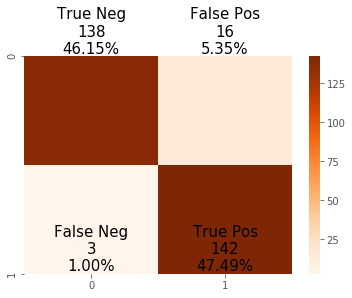

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Define KNN model from sklearn library
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the classifier to the train set
knn.fit(rescaledX_train,y_train)

# Predict on the test set and show confusion matrix
y_pred = knn.predict(rescaledX_test)
cm_knn = confusion_matrix(y_test, y_pred)
visualize_cm(cm_knn)

Taking class 0 as Negative and class 1 as Positive. The confusion matrix shows a higher number in correct predictions: 138 (class 0) and 142 (class 1) against incorrect predictions: 16 (class 0) and 3 (class 1)

## Logistic Regression

Logistic Regression is a statistical analysis technique that predicts a data point based on previous observations. It determines whether an independent variable has an effect on a binary dependent variable, implying that there are only two potential outcomes given some input. We implement the logisitic regression algorithm for classification between two classes i.e. shows symptoms of ASD (class 1) and does not show symptoms (class 0) 

C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


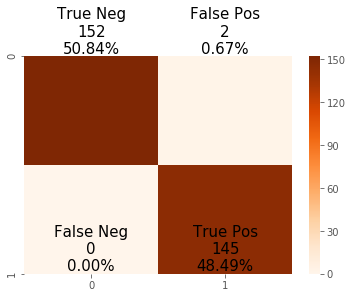

In [130]:
from sklearn.linear_model import LogisticRegression

# Define logistic regression model from sklearn library    
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Predict on the test set and show confusion matrix
y_pred = logreg.predict(rescaledX_test)
cm_logreg = confusion_matrix(y_test, y_pred)
visualize_cm(cm_logreg)

Taking class 0 as Negative and class 1 as Positive. The confusion matrix shows a higher number in correct predictions: 152 (class 0) and 145 (class 1) against incorrect predictions: 2 (class 0) and 0 (class 1)

## Support Vector Machine

Support Vector Machine (SVM) is a supervised learning method that analyzes data and sorts it into one of two categories. During the training process, SVM outputs a map with a defined boundry between the two categories and predicts the category of a new data point based on its location relative to the boundry. We use it to train and then test predictions for classification of ASD. 

C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


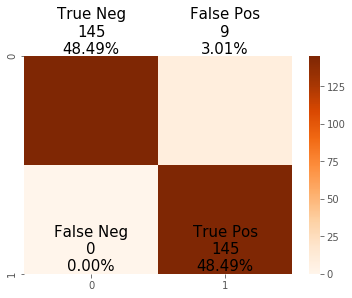

In [68]:
from sklearn.svm import SVC

# Define SVM model from sklearn library
SVM = SVC()

# Fit the classifier to the train set
SVM.fit(rescaledX_train, y_train)

# Predict on the test set and show confusion matrix
y_pred = SVM.predict(rescaledX_test)
cm_svm = confusion_matrix(y_test, y_pred)
visualize_cm(cm_svm)

Taking class 0 as Negative and class 1 as Positive. The confusion matrix shows a higher number in correct predictions: 145 (class 0) and 145 (class 1) against incorrect predictions: 9 (class 0) and 0 (class 1)

# Evaluation and Analysis

## Comparison between Model Performance

After observing the confusion matrix of each model, it can be seen which algorithm is giving the highest performance. While all the algorithms give good results, logistic regression gives only 2 incorrect predictions for class 0 thus shows its higher performance. 

The reason for the high performance of all the algorithms is due to the simplicity of the data invloved. If the classes in the dataset are linearly separable, then it is possible for the algorithms to accuractely identify a separator and give high predictions in testing with validation/unseen data set. Lets now use the score fucntion to get the overall accuracy measure of each algorithm. 

In [133]:
model_names = ['Logistic Regression', 'SVM','Gaussian NB','KNN']
acc = [logreg.score(rescaledX_test, y_test),SVM.score(rescaledX_test, y_test),
        nb.score(rescaledX_test, y_test),knn.score(rescaledX_test, y_test)]

i=0
while (i < 4):
    message = "%s| Accuracy= %f" % (model_names[i], acc[i])
    i = i + 1
    print(message)

Logistic Regression| Accuracy= 0.993311
SVM| Accuracy= 0.969900
Gaussian NB| Accuracy= 0.966555
KNN| Accuracy= 0.936455


Let us also visualize each algorithm's accuracy 

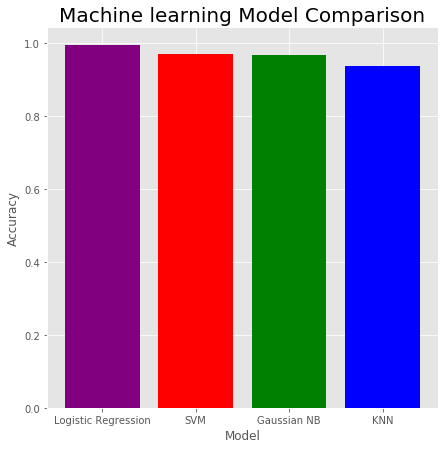

In [134]:
fig, ax = plt.subplots(figsize=(7,7))
ax.bar(model_names, acc, color=['purple', 'red', 'green', 'blue'])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Machine learning Model Comparison', fontsize = 20)
plt.show();

As expected, the Logistic regression algorithm is achieving the highest performance accuracy. Logistic regression performs best when data is linearly separable and that is the case here. The simplicity of the dataset, proper preprocessing steps and the meticulous analysis nature of logistic regression algorithm accounts for its almost perfect accuracy score. 

## Comparison using KFold Cross Validation

By using the holdout set method, we are losing a portion of data that could have been used to train the model. As our dataset size is relatively small (704x11), we could use full contribution of the data in the training process. We can address this problem by implementing cross validation, where model is fitted to the data in sequences of data subsets. Each subset of data is used both for training and validation. A final average validation score is computed after all the data subsets in the sequence are used. Additionally, using this method of validation reduces risk of overfitting. 

KFold cross validation invloves a parameter 'k' which defines the number of subsets that a given data sample will be split into. We will be choosing k as 10 and implement 10 fold cross validation. The following steps will be taken,

1. Dataset will be shuffled randomly based on random_state
2. Dataset will be separated into 10 groups
3. One unique group will be chosen as validation set while the remaining groups are training set
4. Model will be fitted on the training set and evaluated on the validation set
5. Evaluation score will be retained for each model and their average will be used as overall model evaluation score

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

outcome = []
models = [('Logistic Regression', LogisticRegression()), 
          ('SVM', SVC()), 
          ('Gaussian NB', GaussianNB()),
          ('KNN', KNeighborsClassifier())]

for model_name, model in models:
    k_fold_validation = KFold(n_splits=10, random_state=42)
    results = cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    output_message = "%s| Mean Accuracy= %f" % (model_name, results.mean())
    print(output_message)

C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kinza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression| Mean Accuracy= 0.964990
SVM| Mean Accuracy= 0.957828
Gaussian NB| Mean Accuracy= 0.965889
KNN| Mean Accuracy= 0.885687


Let us visualize the distribution of the 10 scores across each group for each algorithm.  

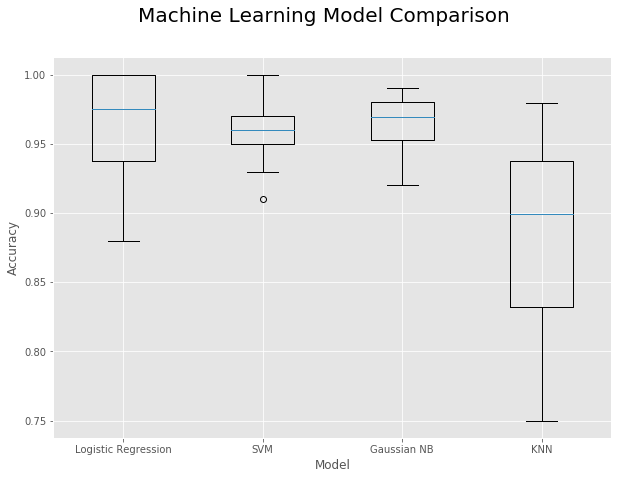

In [138]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Machine Learning Model Comparison', fontsize = 20)
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel("Model")
plt.ylabel("Accuracy")
ax.set_xticklabels(model_names)
plt.show()

The mean accuracies show that it follows the same trend and logistic regression gives highest accuracy. The accuracy magnitude has slightly decreased when compared to method using holdout set. KFold validation gives a better indication of accuracy, with less overfitting than compared to other methods. Therefore, it is more accurate to conclude that our highest performing model, logistic regression gives approximetly 96% accuracy when evaluated on unseen data. 

# References

[1] Dataset: https://www.kaggle.com/faizunnabi/autism-screening

[2] Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM

[3] Vigneshwaran, S., Mahanand, B. S., Suresh, S., & Savitha, R. (2013). Autism spectrum disorder detection using projection based learning meta-cognitive RBF network. The 2013 International Joint Conference on Neural Networks (IJCNN). doi:10.1109/ijcnn.2013.6706777

